In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('experiment.csv', ).iloc[:, 1:]
df.head()

,control,test
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


<AxesSubplot:>

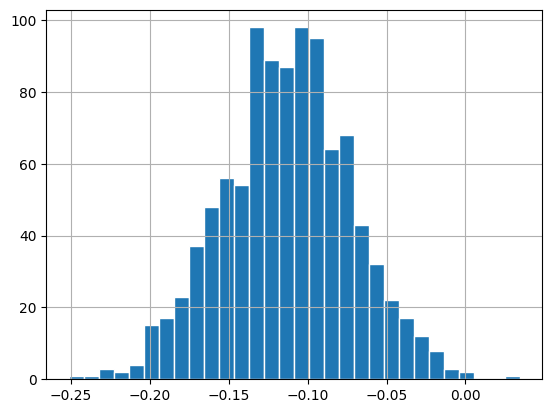

In [3]:
boot_len = df.test.size
n = 1000
dif = []
for _ in range(n):
    s_control = df.control.sample(boot_len, replace=True)
    s_test = df.test.sample(boot_len, replace=True)
    dif.append(np.mean((s_control - s_test)))
pd.Series(dif).hist(bins=30, ec='w')

In [4]:
import scipy.stats as st

In [21]:
ar1 = np.random.randint(0, 2, (3, 10))
ar2 = np.random.randint(0, 2, (3, 10))
ar2

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]])

In [54]:
def my_statistic(sample1, sample2, axis=-1):
     return np.mean(sample1 - sample2, axis=-1)
data = (df.control.to_numpy(), df.test.to_numpy())
res = st.bootstrap(data, my_statistic, method='basic', random_state=1)
# print(res.confidence_interval)
res.bootstrap_distribution

AttributeError: 'BootstrapResult' object has no attribute 'bootstrap_distribution'

AttributeError: 'BootstrapResult' object has no attribute 'bootstrap_distribution'

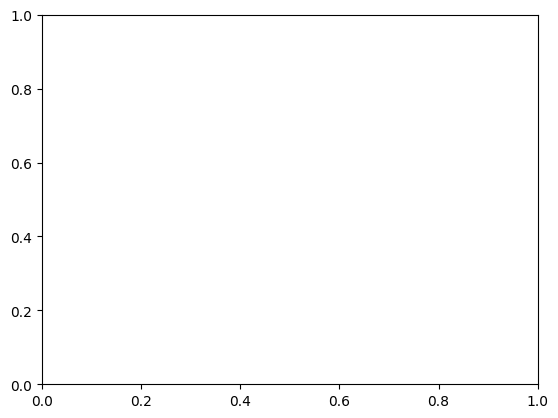

In [57]:
import numpy as np
rng = np.random.default_rng()
from scipy.stats import norm
dist = norm(loc=2, scale=4)  # our "unknown" distribution
data = dist.rvs(size=100, random_state=rng)
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
data = (data,)  # samples must be in a sequence
res = bootstrap(data, np.std, confidence_level=0.9,
                random_state=1)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()